# 期末課題

## 1,序論

**タイトル：** 幸福度が上がる要因として何が最もかかわりが強くなっているか

**氏名：** `有賀勇斗`
**学籍番号：** `1254810041`

---

### なんでそのテーマにしたのか

幸福度が何を基準にして決められているのか、また、幸福度が高い国と低い国での差では何が関係しているか、これらの原因が気になったため、分析をしてみようと思う。


## 2. **データ読み込み**
   - CSVファイルの読み込み
   - データの基本情報表示（head, shape, info など）

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルを読み込む
df = pd.read_csv('world_happiness_report.csv')

# データの最初の5行を表示
df.head()

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [2]:
# データの形状を確認（行数、列数）
print(f"データの形状: {df.shape}")

# データの基本情報
df.info()

データの形状: (1231, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1231 non-null   int64  
 1   Country                        617 non-null    object 
 2   Region                         315 non-null    object 
 3   Happiness Rank                 315 non-null    float64
 4   Happiness Score                315 non-null    float64
 5   Standard Error                 158 non-null    float64
 6   Economy (GDP per Capita)       315 non-null    float64
 7   Family                         470 non-null    float64
 8   Health (Life Expectancy)       315 non-null    float64
 9   Freedom                        470 non-null    float64
 10  Trust (Government Corruption)  315 non-null    float64
 11  Generosity                     1084 non-null   float64
 12  Dystopia Residual            

In [3]:
# 基本統計量を表示
df.describe()

,Unnamed: 0,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
count,1231.000000,315.000000,315.000000,158.000000,315.000000,470.000000,315.000000,470.000000,315.000000,1084.000000,315.000000,1231.000000
mean,615.000000,79.238095,5.378949,0.047885,0.899837,0.990347,0.594054,0.402828,0.140532,0.153545,2.212032,2018.450041
std,355.503399,45.538922,1.141531,0.017146,0.410780,0.318707,0.240790,0.150356,0.115490,0.167592,0.558728,2.284034
min,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300907,0.328580,2015.000000
25%,307.500000,40.000000,4.510000,0.037268,0.594900,0.793000,0.419645,0.297615,0.061315,0.064828,1.884135,2016.000000
50%,615.000000,79.000000,5.286000,0.043940,0.973060,1.025665,0.640450,0.418347,0.106130,0.162140,2.211260,2018.000000
75%,922.500000,118.500000,6.269000,0.052300,1.229000,1.228745,0.787640,0.516850,0.178610,0.252000,2.563470,2020.000000
max,1230.000000,158.000000,7.587000,0.136930,1.824270,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720,2022.000000


## 3,分析や可視化


回帰分析を行い、幸福度に影響が強い要因を調べる。


In [5]:
y = df["Happiness Score"]

X = df[
    [
        "Economy (GDP per Capita)",
        "Family",
        "Health (Life Expectancy)",
        "Freedom",
        "Trust (Government Corruption)",
        "Generosity"
    ]
]

data = pd.concat([y, X], axis=1).dropna()

y = data["Happiness Score"]
X = data.drop(columns="Happiness Score")

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

coef_df = pd.DataFrame({
    "要因": X.columns,
    "回帰係数": model.coef_
})

coef_df

,要因,回帰係数
0,Economy (GDP per Capita),1.179747
1,Family,1.017895
2,Health (Life Expectancy),0.781847
3,Freedom,1.327235
4,Trust (Government Corruption),0.756796
5,Generosity,0.493436


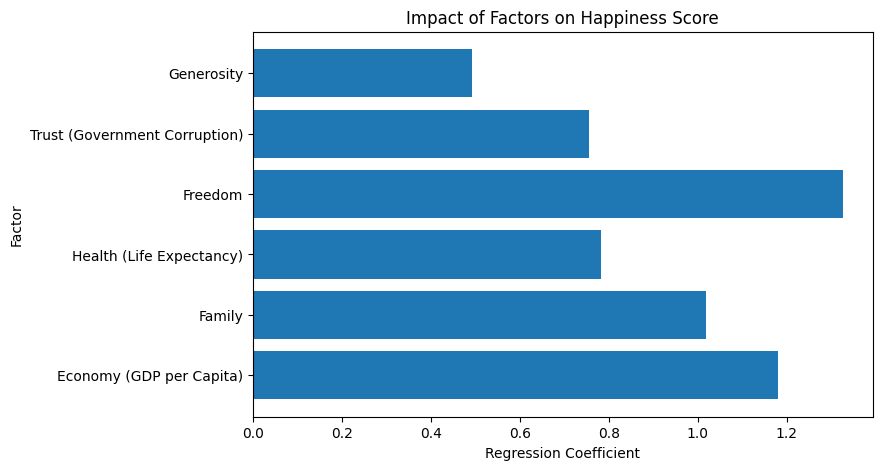

In [17]:
coef_df = pd.DataFrame({
    "Factor": X.columns,
    "Coefficient": model.params[1:]
})

plt.figure(figsize=(8,5))
plt.barh(coef_df["Factor"], coef_df["Coefficient"])
plt.title("Impact of Factors on Happiness Score")
plt.xlabel("Regression Coefficient")
plt.ylabel("Factor")
plt.show()



### 補正R2やp値の当てはまりを確認

In [8]:
from sklearn.metrics import r2_score

y_pred = model.predict(X)
r2_score(y, y_pred)



0.766646123016285

In [9]:
import statsmodels.api as sm

X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()

model_sm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     168.6
Date:                    水, 14 1 2026   Prob (F-statistic):           3.37e-94
Time:                        13:59:35   Log-Likelihood:                -258.97
No. Observations:                 315   AIC:                             531.9
Df Residuals:                     308   BIC:                             558.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             2.1888      0.120     18.314      0.000       1.954       2.424
Economy (GDP per Capita)          1.1797      0.132      8.919      0.000       0.919       1.440
Family                            1.0179      0.147      6.912      0.000       0.728       1.308
Health (Life Expectancy)          0.7818      0.222      3.522      0.000       0.345       1.219
Freedom                           1.3272      0.279      4.761      0.000       0.779       1.876
Trust (Government Corruption)     0.7568      0.325      2.331      0.020       0.118       1.396
Generosity                        0.4934      0.267      1.846      0.066      -0.033       1.019
==============================================================================
Omnibus:                        3.249   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                3.024
Skew:                          -0.174   Prob(JB):                        0.220
Kurtosis:                       3.330   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

重回帰分析の結果、幸福度に`強い正`の影響を与えていたのは
`「Family（社会的つながり）」`や`「Freedom（自由）」`、
`「Economy（GDP per Capita）」`であった。
また、`「Health（平均寿命）」`や`「Freedom」`も統計的に有意な`正`の影響を示した。
このことから、幸福度に影響を与えている原因として「Family（社会的つながり）」であったり、「Economy（GDP per Capita）」、「Freedom（自由）」といった要因が強くかかわっていることが分かった。

### 幸福度が高い国と低い国の値を見てみる

In [11]:
cols = [
    "Country",
    "Happiness Score",
    "Economy (GDP per Capita)",
    "Family",
    "Health (Life Expectancy)",
    "Freedom",
    "Trust (Government Corruption)"
]

data = df[cols].dropna()

q75 = data["Happiness Score"].quantile(0.75)
q25 = data["Happiness Score"].quantile(0.25)

high_happy = data[data["Happiness Score"] >= q75]
low_happy  = data[data["Happiness Score"] <= q25]

factors = [
    "Economy (GDP per Capita)",
    "Family",
    "Health (Life Expectancy)",
    "Freedom",
    "Trust (Government Corruption)"
]

comparison = pd.DataFrame({
    "High Happiness Countries": high_happy[factors].mean(),
    "Low Happiness Countries": low_happy[factors].mean()
})

comparison


,High Happiness Countries,Low Happiness Countries
Economy (GDP per Capita),1.305697,0.486645
Family,1.124572,0.634428
Health (Life Expectancy),0.807654,0.339837
Freedom,0.529327,0.321107
Trust (Government Corruption),0.235364,0.118982


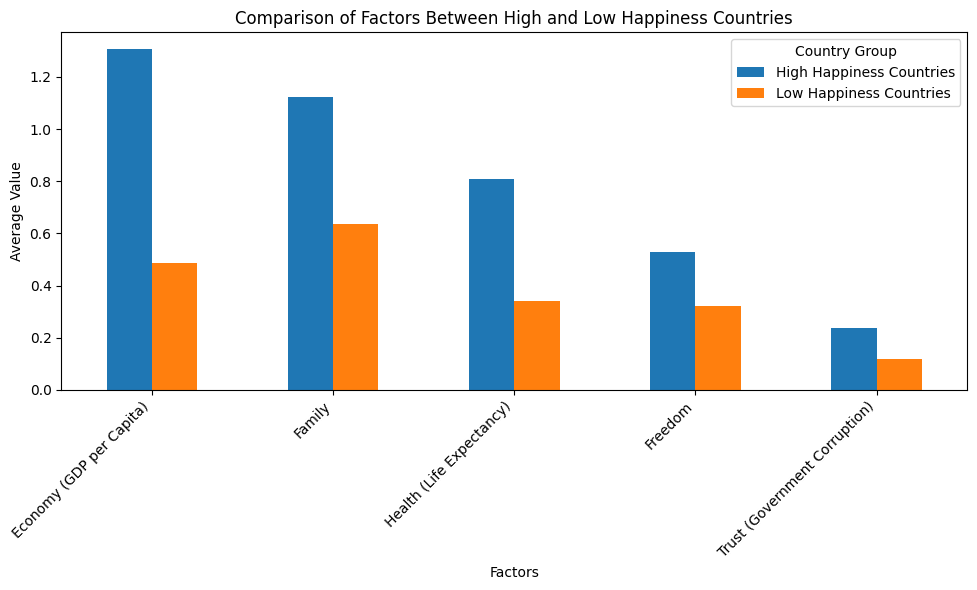

In [12]:
import matplotlib.pyplot as plt

comparison[["High Happiness Countries", "Low Happiness Countries"]].plot(
    kind="bar",
    figsize=(10,6)
)

plt.title("Comparison of Factors Between High and Low Happiness Countries")
plt.xlabel("Factors")
plt.ylabel("Average Value")
plt.legend(title="Country Group")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### 地域別にも観てみる

In [18]:
region_mean = (
    df.groupby("Region")["Happiness Score"]
    .mean()
    .sort_values(ascending=False)
)

region_mean


Region
Australia and New Zealand          7.304250
North America                      7.263500
Western Europe                     6.687643
Latin America and Caribbean        6.122283
Eastern Asia                       5.625167
Middle East and Northern Africa    5.396744
Central and Eastern Europe         5.351810
Southeastern Asia                  5.328167
Southern Asia                      4.572071
Sub-Saharan Africa                 4.170462
Name: Happiness Score, dtype: float64

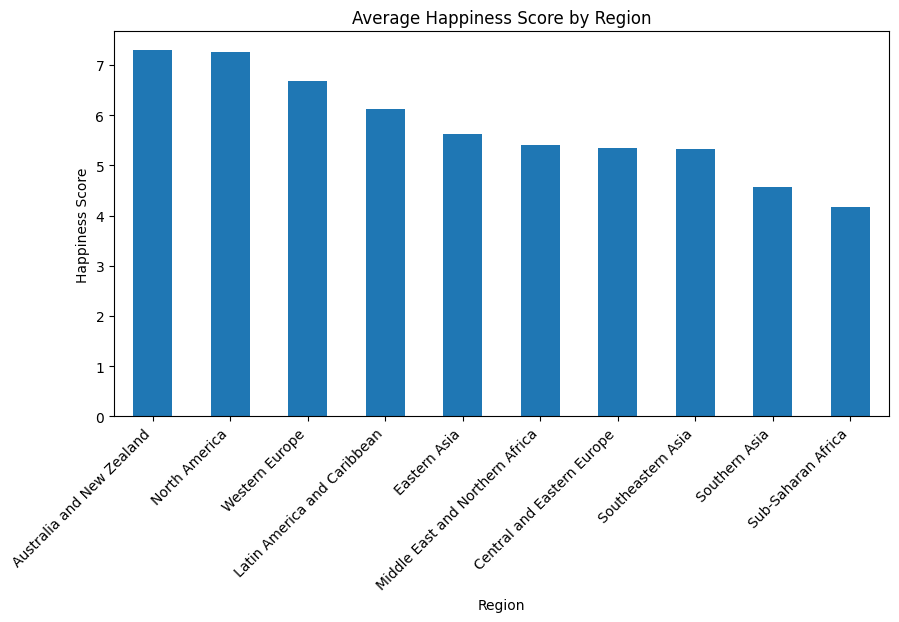

In [19]:
plt.figure(figsize=(10,5))
region_mean.plot(kind="bar")
plt.title("Average Happiness Score by Region")
plt.xlabel("Region")
plt.ylabel("Happiness Score")
plt.xticks(rotation=45, ha="right")
plt.show()

幸福度が高い国と低い国ではなにがさをあるのかを見てみたところ、幸福度との相関が強い、「Economy（GDP per Capita）」だったり、「Family（社会的つながり）」が約倍以上の差がみられていることからこれら二つの要因が幸福度が決まるうえでの一つの大きなポイントになっている。
地域別比較では、欧米諸国を中心とした地域で平均幸福度が高い傾向が確認されている。


### ４，まとめ
今回は「幸福度がどのような要因によって高まるのか」、
また「幸福度が高い国と低い国にはどのような違いがあるのか」を分析した。

重回帰分析を行った結果、他の要因を同時に考慮した場合でも、`Family`および`Economy`は統計的に有意な正の影響を持ち、幸福度を高める主要な要因であることが確認された。この結果から、経済的な豊かさは幸福度の基盤として重要である一方、社会的なつながりの強さが幸福度により直接的な影響を与えていることが分かった。
